# Group 9: Code for the model we're emulating


## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

## Read the sampled CICIDS2017 dataset
The CICIDS2017 dataset is publicly available at: https://www.unb.ca/cic/datasets/ids-2017.html  
Due to the large size of this dataset, the sampled subsets of CICIDS2017 is used. The subsets are in the "data" folder.  
If you want to use this code on other datasets (e.g., CAN-intrusion dataset), just change the dataset name and follow the same steps.  
The models in this code are generic models that can be used in any intrusion detection/network traffic datasets.

In [2]:
#Read dataset
df = pd.read_csv('./data/2017-data/CICIDS2017_sample_km.csv') 

In [3]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,4.171167e-02,0.000018,0.000010,4.643411e-05,3.083364e-06,0.024134,0.000000,0.020165,0.037594,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26796,4.180643e-02,0.000018,0.000017,4.643411e-05,6.329973e-06,0.024134,0.000000,0.020165,0.037594,0.138300,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26797,4.174313e-02,0.000014,0.000014,4.643411e-05,3.083364e-06,0.024134,0.000000,0.025207,0.042032,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26798,7.166666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [4]:
df.Label.value_counts()

Label
0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

In [5]:
# traverse through all files in 2019-data
import os
data_2019_directory = './data/2019-data/'
filenames_2019_data = [filename for filename in os.listdir(data_2019_directory)]

firstDataFile = data_2019_directory + filenames_2019_data[0]
dataframe_all_2019_data = pd.read_csv(firstDataFile)[:80]
print("File Path " + firstDataFile + " is read into the 2019 dataframe.")


# read every file into a dataframe
for index in range(1, len(filenames_2019_data)):
    fileName = filenames_2019_data[index]
    # capturing full path of file
    fullFilePath = data_2019_directory + fileName
    
    # reading first 20 rows of each csv into temporary data frame, then adding that data to the 2019 dataframe
    temporary_data_frame = pd.read_csv(fullFilePath)[:80]
    #dataframe_all_2019_data =  dataframe_all_2019_data[dataframe_all_2019_data['Label'] != 'BENIGN']
    
    #temporary_data_frame = temporary_data_frame[temporary_data_frame['Label'] != 'BENIGN']
    dataframe_all_2019_data = pd.concat([dataframe_all_2019_data, temporary_data_frame])
    print("File Path " + fullFilePath + " is read into the 2019 dataframe.")

File Path ./data/2019-data/DrDoS_DNS_data_1_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_LDAP_data_2_0_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_MSSQL_data_1_3_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_NetBIOS_data_1_3_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_NTP_data_data_5_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_SNMP_data_1_3_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_SSDP_data_2_per_sample.csv is read into the 2019 dataframe.
File Path ./data/2019-data/DrDoS_UDP_data_2_per_sample.csv is read into the 2019 dataframe.


In [6]:
# generating a list of the columns present in the 2017 data frame
list_2017 = df.columns
set_2017 = set(list_2017)

# generating a list of the columns present in the 2019 data frame
list_2019 = dataframe_all_2019_data.columns

# if column has whitespace, remove the whitespace.
for column_name in list_2019:
    if column_name[0] == ' ' or column_name[-1] == ' ':
        dataframe_all_2019_data = dataframe_all_2019_data.rename(columns= {column_name: column_name.strip()})
        
# a Python set of all the 2019 data columns
set_newer = set(dataframe_all_2019_data.columns)

# removing columns from 2019 data frame that don't appear in 2017 data
for name in set_newer:
    if name not in set_2017:
        dataframe_all_2019_data.drop(name, axis=1, inplace=True)

In [7]:

# Filter out BENIGN
dataframe_all_2019_data =  dataframe_all_2019_data[dataframe_all_2019_data['Label'] != 'BENIGN']

In [8]:
# transforming text string of label into a numeric value label
labelencoder = LabelEncoder()
dataframe_all_2019_data.iloc[:, -1] = labelencoder.fit_transform(dataframe_all_2019_data.iloc[:, -1])

# filling n/a data with 0 and replacing infinity with a large value
dataframe_all_2019_data = dataframe_all_2019_data.fillna(0)
dataframe_all_2019_data.replace([np.inf, -np.inf], 10000000, inplace=True)

In [9]:
#dataframe_all_2019_data.Label.value_counts()

#capturing the number of unique labels generated
unique_labels_count = dataframe_all_2019_data.Label.value_counts().count()


# as all these attacks are of type DoS, they should be grouped with the same 
# label as the DoS attacks in the 2017 data
for number in range(unique_labels_count):
    dataframe_all_2019_data = dataframe_all_2019_data.replace(number, 3)

In [10]:
# now appending the 2019 data from to the 2017 data. They are combined and whole
df = pd.concat([df, dataframe_all_2019_data])

In [11]:
# Extracts the names of columns in df whose data types are not 'object'
numeric_features = df.dtypes[df.dtypes != 'object'].index

### splitting up into the training and testing sets

In [12]:
# Separates a DataFrame into two parts: X, which contains all columns except 'Label' and y, which contains the flattened
# last column as a 1D array for target labels.

X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)

In [13]:
# Utilizing the same proportion of training and testing data that the authors used
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Feature engineering

### Feature selection by information gain

In [14]:
# Identify numeric features in our dataframe and compute the scores with the target variable using mutual_info_classif, 
# which helps evaluate feature importance in classification tasks.

from sklearn.feature_selection import mutual_info_classif
numeric_features = df.dtypes[df.dtypes != 'object'].index
mutual_info_scores = mutual_info_classif(X_train, y_train)

In [15]:
# Sort features by their importance scores in descending order, rounding scores to 4 decimal places
sorted_features = sorted(zip(map(lambda x: round(x, 4), mutual_info_scores), numeric_features), reverse=True)

# Initialize variables to store the total importance score and a list of feature names
total_importances = 0
selected_features = []

# Iterate through the sorted feature list to calculate total importance and extract feature names
for i in range(0, len(sorted_features)):
    total_importances = total_importances + sorted_features[i][0]
    selected_features.append(sorted_features[i][1])

In [16]:
# select the important features from top to bottom until the accumulated importance reaches 90%
sorted_features_normalized = sorted(zip(map(lambda x: round(x, 4), mutual_info_scores/total_importances), numeric_features), reverse=True)

# Initialize variables for cumulative importance and the list of selected feature names
cumulative_importance = 0
selected_features = []

# Iterate through the normalized feature list, selecting features until cumulative importance reaches 90%
for i in range(0, len(sorted_features_normalized)):
    cumulative_importance = cumulative_importance + sorted_features_normalized[i][0]
    selected_features.append(sorted_features_normalized[i][1])
    if cumulative_importance>=0.9:
        break        

In [17]:
# For this cell and the one below, we create a NumPy array that only contains the selected features from our dataframe and 
# outputs the dimensions to confirm the number of rows and selected columns.
X_selected = df[selected_features].values

In [18]:
X_selected.shape

(27385, 47)

### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [19]:
# Initialize a Fast Correlation-Based Filter feature selector to select the top 20 features (k = 20)

from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)

In [20]:
# Create a NumPy array with the selected important features for model input
X_fss = fcbf.fit_transform(X_selected,y)

In [21]:
X_fss.shape

(27385, 20)

### Re-split train & test sets after feature selection

In [22]:
# Transform the feature set using FCBF to reduce dimensions
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [23]:
X_train.shape

(21908, 20)

In [24]:
pd.Series(y_train).value_counts()

0    14580
3     2901
6     1744
1     1573
5     1004
2       77
4       29
Name: count, dtype: int64

### SMOTE to solve class-imbalance

In [25]:
# Apply Synthetic Minority Oversampling Technique (SMOTE) to balance the training dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [26]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [27]:
pd.Series(y_train).value_counts()

0    14580
3     2901
6     1744
1     1573
5     1004
2     1000
4     1000
Name: count, dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

#### Apply XGBoost

Accuracy of XGBoost: 0.989958006207778
Precision of XGBoost: 0.9900631883844246
Recall of XGBoost: 0.989958006207778
F1-score of XGBoost: 0.9899851514057036
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3645
           1       0.98      0.98      0.98       393
           2       0.90      1.00      0.95        19
           3       0.99      0.99      0.99       726
           4       0.88      1.00      0.93         7
           5       0.99      0.99      0.99       251
           6       0.97      0.99      0.98       436

    accuracy                           0.99      5477
   macro avg       0.96      0.99      0.97      5477
weighted avg       0.99      0.99      0.99      5477



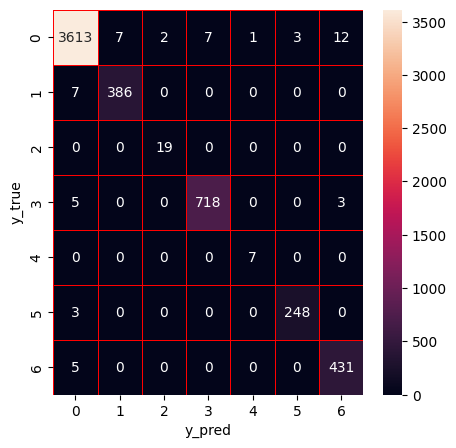

In [28]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [29]:
# Optimize hyperparameters for MiniBatchKMeans using Hyperopt with Tree-structured Parzen Estimator (TPE)
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:14<00:00,  1.34trial/s, best loss: -0.9961657841884243]
XGBoost: Hyperopt estimated optimum {'learning_rate': np.float64(0.574448352197523), 'max_depth': np.float64(84.0), 'n_estimators': np.float64(75.0)}


Accuracy of XGBoost: 0.9959832024831112
Precision of XGBoost: 0.9961565663949048
Recall of XGBoost: 0.9959832024831112
F1-score of XGBoost: 0.9960322248472948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       0.99      1.00      1.00       726
           4       0.70      1.00      0.82         7
           5       0.99      1.00      0.99       251
           6       1.00      0.99      1.00       436

    accuracy                           1.00      5477
   macro avg       0.95      1.00      0.97      5477
weighted avg       1.00      1.00      1.00      5477



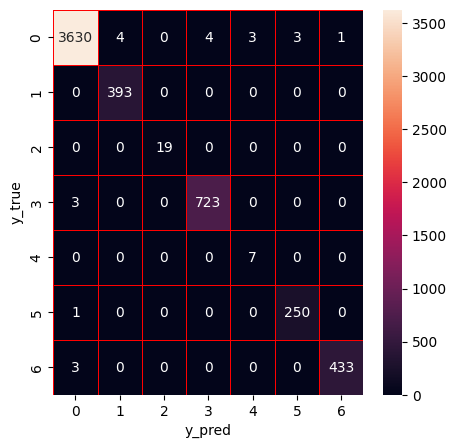

In [30]:
xg = xgb.XGBClassifier(learning_rate= 0.7340229699980686, n_estimators = 70, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [31]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

#### Apply RF

Accuracy of RF: 0.9936096403140405
Precision of RF: 0.9936922468557114
Recall of RF: 0.9936096403140405
F1-score of RF: 0.9936306660728528
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3645
           1       0.99      1.00      1.00       393
           2       1.00      1.00      1.00        19
           3       0.99      0.99      0.99       726
           4       0.78      1.00      0.88         7
           5       0.99      1.00      0.99       251
           6       0.98      0.98      0.98       436

    accuracy                           0.99      5477
   macro avg       0.96      0.99      0.98      5477
weighted avg       0.99      0.99      0.99      5477



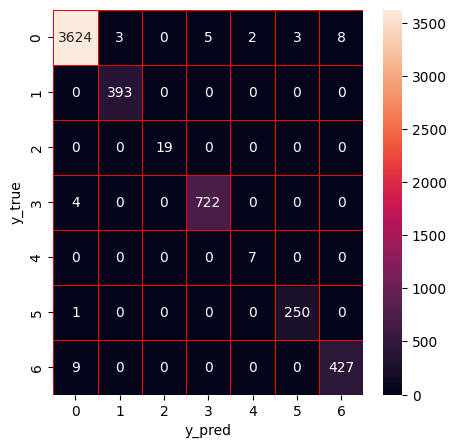

In [32]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [33]:
# Optimize hyperparameters for MiniBatchKMeans using Hyperopt with Tree-structured Parzen Estimator (TPE) and random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier(random_state=0 ,**params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:40<00:00,  5.04s/trial, best loss: -0.9934270586087274]
Random Forest: Hyperopt estimated optimum {'criterion': np.int64(1), 'max_depth': np.float64(25.0), 'max_features': np.float64(4.0), 'min_samples_leaf': np.float64(1.0), 'min_samples_split': np.float64(6.0), 'n_estimators': np.float64(128.0)}


Accuracy of RF: 0.9939748037246667
Precision of RF: 0.9940384751684442
Recall of RF: 0.9939748037246667
F1-score of RF: 0.9939965477889757
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       0.99      1.00      1.00       726
           4       0.75      0.86      0.80         7
           5       0.98      0.99      0.99       251
           6       0.98      0.99      0.99       436

    accuracy                           0.99      5477
   macro avg       0.96      0.98      0.97      5477
weighted avg       0.99      0.99      0.99      5477



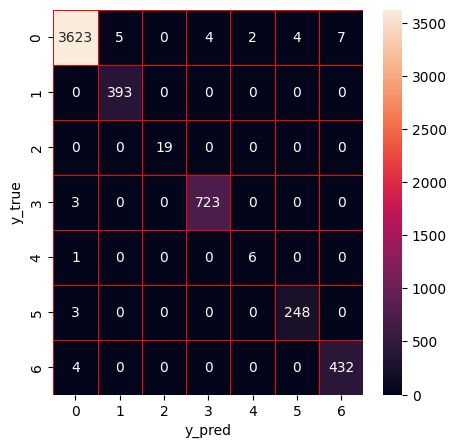

In [34]:
rf_hpo = RandomForestClassifier(n_estimators = 71, min_samples_leaf = 1, max_depth = 46, min_samples_split = 9, max_features = 20, criterion = 'entropy', random_state=0)
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [35]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

#### Apply DT

Accuracy of DT: 0.9895928427971518
Precision of DT: 0.9906981752488236
Recall of DT: 0.9895928427971518
F1-score of DT: 0.989971103911922
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3645
           1       0.98      1.00      0.99       393
           2       0.95      1.00      0.97        19
           3       0.99      0.99      0.99       726
           4       0.41      1.00      0.58         7
           5       0.98      1.00      0.99       251
           6       0.97      0.97      0.97       436

    accuracy                           0.99      5477
   macro avg       0.90      0.99      0.93      5477
weighted avg       0.99      0.99      0.99      5477



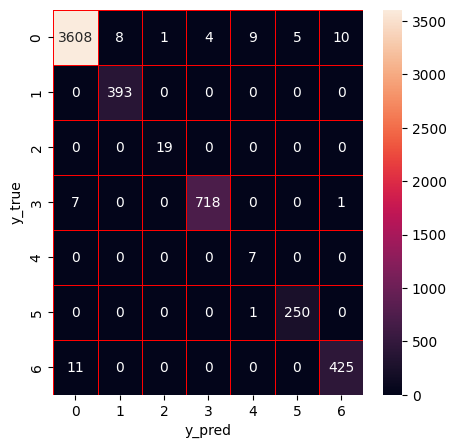

In [36]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [37]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier(random_state=0, **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:05<00:00,  9.76trial/s, best loss: -0.9937922220193537]
Decision tree: Hyperopt estimated optimum {'criterion': np.int64(1), 'max_depth': np.float64(50.0), 'max_features': np.float64(18.0), 'min_samples_leaf': np.float64(1.0), 'min_samples_split': np.float64(6.0)}


Accuracy of DT: 0.989958006207778
Precision of DT: 0.9909145493815781
Recall of DT: 0.989958006207778
F1-score of DT: 0.9902749379710578
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3645
           1       0.98      1.00      0.99       393
           2       0.90      1.00      0.95        19
           3       0.99      0.99      0.99       726
           4       0.44      1.00      0.61         7
           5       0.98      1.00      0.99       251
           6       0.98      0.97      0.98       436

    accuracy                           0.99      5477
   macro avg       0.90      0.99      0.93      5477
weighted avg       0.99      0.99      0.99      5477



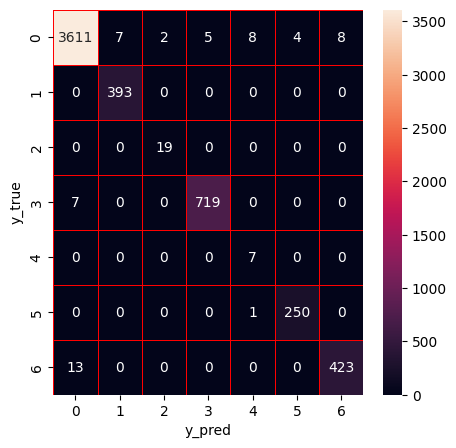

In [38]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini', random_state=0)
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [39]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Apply ET

Accuracy of ET: 0.9948877122512324
Precision of ET: 0.9948932656207664
Recall of ET: 0.9948877122512324
F1-score of ET: 0.9948869524048605
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      1.00       393
           2       1.00      1.00      1.00        19
           3       0.99      0.99      0.99       726
           4       1.00      1.00      1.00         7
           5       0.99      1.00      0.99       251
           6       1.00      0.99      0.99       436

    accuracy                           0.99      5477
   macro avg       0.99      1.00      1.00      5477
weighted avg       0.99      0.99      0.99      5477



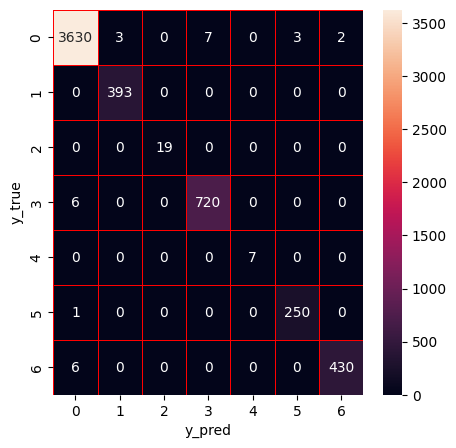

In [40]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [41]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier(random_state=0, **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:20<00:00,  1.01s/trial, best loss: -0.9906883330290305]
Random Forest: Hyperopt estimated optimum {'criterion': np.int64(1), 'max_depth': np.float64(23.0), 'max_features': np.float64(18.0), 'min_samples_leaf': np.float64(3.0), 'min_samples_split': np.float64(3.0), 'n_estimators': np.float64(167.0)}


Accuracy of ET: 0.9954354573671718
Precision of ET: 0.9954487260676353
Recall of ET: 0.9954354573671718
F1-score of ET: 0.9954300014036344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       0.99      1.00      0.99       726
           4       1.00      0.86      0.92         7
           5       0.99      1.00      0.99       251
           6       1.00      0.99      0.99       436

    accuracy                           1.00      5477
   macro avg       0.99      0.98      0.98      5477
weighted avg       1.00      1.00      1.00      5477



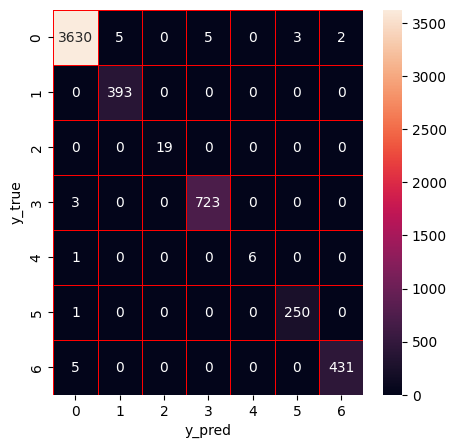

In [42]:
et_hpo = ExtraTreesClassifier(n_estimators = 53, min_samples_leaf = 1, max_depth = 31, min_samples_split = 5, max_features = 20, criterion = 'entropy', random_state=0)
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [43]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

### Apply Stacking
The ensemble model that combines the four ML models (DT, RF, ET, XGBoost)

In [44]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [45]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [46]:
dt_train.shape

(23802, 1)

In [47]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9952528756618587
Precision of Stacking: 0.995429804803022
Recall of Stacking: 0.9952528756618587
F1-score of Stacking: 0.9953020254775008
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       0.99      1.00      0.99       726
           4       0.70      1.00      0.82         7
           5       0.99      1.00      0.99       251
           6       1.00      0.99      0.99       436

    accuracy                           1.00      5477
   macro avg       0.95      1.00      0.97      5477
weighted avg       1.00      1.00      1.00      5477



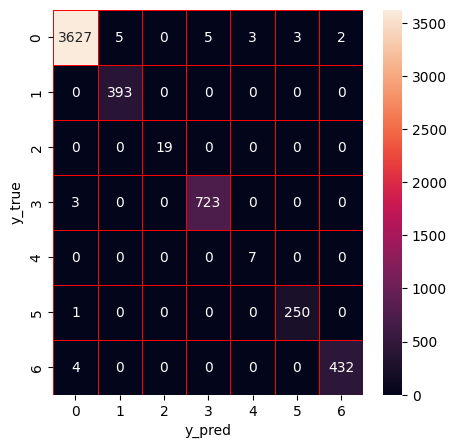

In [48]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [49]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:05<00:00,  3.45trial/s, best loss: -0.9952528756618587]
XGBoost: Hyperopt estimated optimum {'learning_rate': np.float64(0.8614193489076387), 'max_depth': np.float64(96.0), 'n_estimators': np.float64(45.0)}


Accuracy of XGBoost: 0.9952528756618587
Precision of XGBoost: 0.995429804803022
Recall of XGBoost: 0.9952528756618587
F1-score of XGBoost: 0.9953020254775008
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.99      1.00      0.99       393
           2       1.00      1.00      1.00        19
           3       0.99      1.00      0.99       726
           4       0.70      1.00      0.82         7
           5       0.99      1.00      0.99       251
           6       1.00      0.99      0.99       436

    accuracy                           1.00      5477
   macro avg       0.95      1.00      0.97      5477
weighted avg       1.00      1.00      1.00      5477



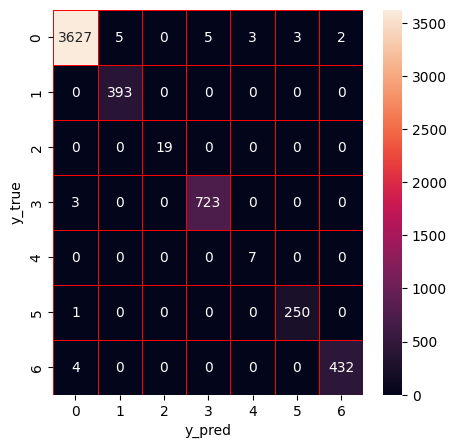

In [50]:
xg = xgb.XGBClassifier(learning_rate= 0.19229249758051492, n_estimators = 30, max_depth = 36)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Anomaly-based IDS

### Generate the port-scan datasets for unknown attack detection

In [51]:
#df=pd.read_csv('./data/CICIDS2017_sample_km.csv')

In [52]:
df.Label.value_counts()

Label
0    18225
3     3627
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

In [53]:
df1 = df[df['Label'] != 5]
df1['Label'][df1['Label'] > 0] = 1
df1.to_csv('./data/CICIDS2017_sample_km_without_portscan.csv',index=0)

In [54]:
df2 = df[df['Label'] == 5]
df2['Label'][df2['Label'] == 5] = 1
df2.to_csv('./data/CICIDS2017_sample_km_portscan.csv',index=0)

### Read the generated datasets for unknown attack detection

In [55]:
df1 = pd.read_csv('./data/CICIDS2017_sample_km_without_portscan.csv')
df2 = pd.read_csv('./data/CICIDS2017_sample_km_portscan.csv')

In [56]:
numeric_features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[numeric_features] = df1[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[numeric_features] = df2[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [57]:
df1.Label.value_counts()

Label
0    18225
1     7905
Name: count, dtype: int64

In [58]:
df2.Label.value_counts()

Label
1    1255
Name: count, dtype: int64

In [59]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=1255/18225, replace=False, weights=None, random_state=0, axis=0)
df2=pd.concat([df2, df2pp])

In [60]:
df2.Label.value_counts()

Label
1    1255
0    1255
Name: count, dtype: int64

In [61]:
df = pd.concat([df1, df2])

In [62]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
pd.Series(y).value_counts()

0    19480
1     9160
Name: count, dtype: int64

### Feature engineering (IG, FCBF, and KPCA)

#### Feature selection by information gain (IG)

In [63]:
# Calculate mutual information scores for feature importance
from sklearn.feature_selection import mutual_info_classif
mutual_info_scores = mutual_info_classif(X, y)

In [64]:
# Sort features by importance scores in descending order and calculate total importance
# Also, extract feature names for further processing
sorted_features = sorted(zip(map(lambda x: round(x, 4), mutual_info_scores), numeric_features), reverse=True)
total_importances = 0
selected_features = []
for i in range(0, len(sorted_features)):
    total_importances = total_importances + sorted_features[i][0]
    selected_features.append(sorted_features[i][1])

In [65]:
# Select the important features from top to bottom until the accumulated importance reaches 90%
sorted_features_normalized = sorted(zip(map(lambda x: round(x, 4), mutual_info_scores/total_importances), numeric_features), reverse=True)
cumulative_importance = 0
selected_features = []
for i in range(0, len(sorted_features_normalized)):
    cumulative_importance = cumulative_importance + sorted_features_normalized[i][0]
    selected_features.append(sorted_features_normalized[i][1])
    if cumulative_importance>=0.9:
        break        

In [66]:
X_selected = df[selected_features].values

In [67]:
X_selected.shape

(28640, 59)

In [68]:
X_selected

array([[-0.0114377 , -0.04071938, -0.12452716, ..., -0.22518934,
        -0.15147407, -0.20740126],
       [-0.01143677, -0.04071938, -0.12452716, ..., -0.22518934,
        -0.15147407, -0.20740126],
       [-0.01143677, -0.04071938, -0.12452716, ..., -0.22518934,
        -0.15147407, -0.20740126],
       ...,
       [-0.01144936, -0.0228449 , -0.12397566, ..., -0.22518934,
        -0.15147407, -0.20740126],
       [-0.01134862, -0.03797516, -0.12431573, ..., -0.22518934,
        -0.15147407, -0.20740126],
       [-0.01144941, -0.04071938, -0.12453948, ..., -0.22518934,
        -0.15147407, -0.20740126]])

#### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [69]:
# Initialize the Fast Correlation Based Filter (FCBF) method for feature selection
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)

In [70]:
X_fss = fcbf.fit_transform(X_selected,y)

In [71]:
X_fss.shape

(28640, 20)

In [72]:
X_fss

array([[-0.0114377 , -0.02105351, -0.15147407, ..., -0.01159936,
        -0.022446  , -0.12499637],
       [-0.01143677, -0.02105618, -0.15147407, ..., -0.01159936,
        -0.022446  , -0.12499637],
       [-0.01143677, -0.02105726, -0.15147407, ..., -0.01159936,
        -0.022446  , -0.12499637],
       ...,
       [-0.01144936, -0.02105817, -0.15147407, ..., -0.01159936,
        -0.022446  , -0.12462652],
       [-0.01134862, -0.02096301, -0.15147407, ..., -0.01159919,
        -0.02244562, -0.12492858],
       [-0.01144941, -0.02105482, -0.15147407, ..., -0.01159936,
        -0.022446  , -0.12499803]])

####  kernel principal component analysis (KPCA)

In [73]:
# Transform the feature set using FCBF to reduce dimensions
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)

# from sklearn.decomposition import PCA
# kpca = PCA(n_components = 10)
# kpca.fit(X_fss, y)
# X_kpca = kpca.transform(X_fss)

### Train-test split after feature selection

In [74]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

### Solve class-imbalance by SMOTE

In [75]:
pd.Series(y_train).value_counts()

0    18225
1     7905
Name: count, dtype: int64

In [76]:
# Apply Synthetic Minority Oversampling Technique (SMOTE) to balance the training dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:18225})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [77]:
pd.Series(y_train).value_counts()

0    18225
1    18225
Name: count, dtype: int64

In [78]:
pd.Series(y_test).value_counts()

1    1255
0    1255
Name: count, dtype: int64

### Apply the cluster labeling (CL) k-means method

In [79]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [80]:
# A function for cluster labeling using MiniBatchKMeans
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b, random_state=0)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [81]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1255
           1       0.86      1.00      0.93      1255

    accuracy                           0.92      2510
   macro avg       0.93      0.92      0.92      2510
weighted avg       0.93      0.92      0.92      2510

0.9191235059760956
[[1052  203]
 [   0 1255]]


### Hyperparameter optimization of CL-k-means
Tune "k"

In [82]:
#Hyperparameter optimization by BO-GP
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100,random_state=0, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.8705179282868526
43 0.9235059760956176
43 0.9235059760956176
43 0.9235059760956176
32 0.8772908366533865
20 0.9581673306772909
16 0.8589641434262948
5 0.37211155378486055
15 0.9601593625498008
25 0.9792828685258964
23 0.9517928286852589
50 0.9083665338645418
13 0.9235059760956176
38 0.8880478087649403
47 0.9442231075697212
24 0.9717131474103585
26 0.8788844621513944
22 0.8641434262948208
13 0.9235059760956176
46 0.9235059760956176
4.349738597869873
Best score=0.9793
Best parameters: n_clusters=25


In [83]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, random_state=0, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

24 0.9717131474103585                                 
15 0.9601593625498008                                                             
43 0.9235059760956176                                                             
27 0.8784860557768924                                                             
50 0.9083665338645418                                                             
28 0.8792828685258964                                                             
36 0.8940239043824701                                                             
30 0.8705179282868526                                                             
23 0.9517928286852589                                                             
35 0.8772908366533865                                                             
25 0.9792828685258964                                                              
37 0.8900398406374502                                                              
6 0.36294820717131476         

In [84]:
CL_kmeans(X_train, X_test, y_train, y_test, 16)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1255
           1       0.78      1.00      0.88      1255

    accuracy                           0.86      2510
   macro avg       0.89      0.86      0.86      2510
weighted avg       0.89      0.86      0.86      2510

0.8589641434262948
[[ 901  354]
 [   0 1255]]


### Apply the CL-k-means model with biased classifiers

In [85]:
# Only a sample code to show the logic. It needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_IDS(X_train, X_test, y_train, y_test, n, b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b, random_state=0)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count = 0
    a = np.zeros(n)
    b = np.zeros(n)

    for v in range(0, n):
        for i in range(0, len(y_train)):
            if result[i] == v:
                if y_train[i] == 1:
                    a[v] += 1
                else:
                    b[v] += 1
    list1 = []
    list2 = []
    for v in range(0, n):
        if a[v] <= b[v]:
            list1.append(v)
        else:
            list2.append(v)

    # Process y_test
    for v in range(0, len(y_test)):
        if result2[v] in list1:
            result2[v] = 0
        elif result2[v] in list2:
            result2[v] = 1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm = confusion_matrix(y_test, result2)
    acc = metrics.accuracy_score(y_test, result2)  # Using y_test here
    print(f"Accuracy: {acc}")
    print(cm)

    #Biased classifier construction
    count = 0
    print(len(y_train))
    a = np.zeros(n)
    b = np.zeros(n)
    FNL = []
    FPL = []
    for v in range(0, n):
        al = []
        bl = []
        for i in range(0, len(y_train)):
            if result[i] == v:
                if y_train[i] == 1:  # label 1
                    a[v] += 1
                    al.append(i)
                else:  # label 0
                    b[v] += 1
                    bl.append(i)
        if a[v] <= b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)

    dffp = df.iloc[FPL, :]
    dffn = df.iloc[FNL, :]
    dfva0 = df[df['Label'] == 0]
    dfva1 = df[df['Label'] == 1]

    dffpp = dfva1.sample(frac=len(FPL) / dfva1.shape[0], random_state=0)
    dffnp = dfva0.sample(frac=len(FNL) / dfva0.shape[0], random_state=0)

    dffp_f = pd.concat([dffp, dffpp])
    dffn_f = pd.concat([dffn, dffnp])

    # Train biased classifiers
    Xp = dffp_f.drop(['Label'], axis=1)
    yp = np.ravel(dffp_f['Label'].values)

    Xn = dffn_f.drop(['Label'], axis=1)
    yn = np.ravel(dffn_f['Label'].values)

    rfp = RandomForestClassifier(random_state=0)
    rfp.fit(Xp, yp)
    rfn = RandomForestClassifier(random_state=0)
    rfn.fit(Xn, yn)

    # Align features between train and test
    X2p = df2.drop(['Label'], axis=1)
    X2p = X2p.iloc[:, :X_train.shape[1]]
    y2p = np.ravel(df2['Label'].values)

    result2 = km_cluster.predict(X2p)

    count = 0
    a = np.zeros(n)
    b = np.zeros(n)
    for v in range(0, n):
        for i in range(0, len(y_train)):
            if result[i] == v:
                if y_train[i] == 1:
                    a[v] += 1
                else:
                    b[v] += 1
    list1 = []
    list2 = []
    l1 = []
    l0 = []
    for v in range(0, n):
        if a[v] <= b[v]:
            list1.append(v)
        else:
            list2.append(v)
    for v in range(0, len(y2p)):
        if result2[v] in list1:
            result2[v] = 0
            l0.append(v)
        elif result2[v] in list2:
            result2[v] = 1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm = confusion_matrix(y2p, result2)
    print(cm)

In [86]:
from sklearn.datasets import make_classification


# Default n_sample seems to be 100 but we'll do 1000
X, y = make_classification(n_samples=1000, n_features=77, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ok so the n argument represents the number of clusters. The b argument is the batch size for the MiniBatchKMeans

# A higher value of n creates more clusters, capturing finer-grained patterns in the data.
# If n is too small, distinct behaviors (e.g., different attack types) may get lumped together, reducing the ability to distinguish between benign and malicious traffic.
# If n is too large, overfitting may occur, as clusters may become too specific to the training data, reducing generalization.

# Instead of using the entire dataset at once, the algorithm processes the data in chunks (or batches) of size b (the argument), making it more memory efficient.
# If b is too small, the clustering algorithm might converge to suboptimal clusters due to insufficient data in each batch.
# If b is very large (close to the dataset size), the method essentially behaves like traditional KMeans, which could be computationally expensive for large datasets.

Anomaly_IDS(X_train, X_test, y_train, y_test, n=5, b=100)

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        98
           1       0.72      0.91      0.80       102

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.76       200
weighted avg       0.79      0.77      0.76       200

Accuracy: 0.77
[[61 37]
 [ 9 93]]
800
              precision    recall  f1-score   support

           0       0.04      0.02      0.03      1255
           1       0.34      0.51      0.41      1255

    accuracy                           0.27      2510
   macro avg       0.19      0.27      0.22      2510
weighted avg       0.19      0.27      0.22      2510

[[  27 1228]
 [ 613  642]]


95% of the code has been shared, and the remaining 5% is retained for future extension.  
Thank you for your interest and more details are in the paper.